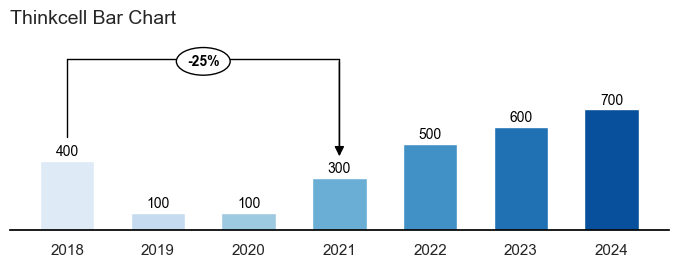

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

def create_chart(categories, values, title_text, arrow_start, arrow_end, save_as=None):
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.2, rc={"font.family": "Arial"})

    fig, ax = plt.subplots(figsize=(8.5, 2.5))
    bar_width = 0.6
    index = range(len(categories))
    bars = ax.bar(index, values, width=bar_width, color=sns.color_palette("Blues", len(values)))

    for spine in ax.spines.values():
        spine.set_edgecolor('black')

    ax.set_title(title_text, fontsize=14, loc='left', pad=10)
    ax.set_xticks(index)
    ax.set_xticklabels(categories, fontsize=11)
    
    max_val = max(values)
    dynamic_top_padding = max_val * 0.6  # 10% of the max value for top padding
    ax.set_ylim(0, max_val + dynamic_top_padding)
    
    ax.set_yticks([])
    ax.yaxis.grid(False)
    ax.set_xlabel('')
    ax.grid(False)

    dynamic_text_padding = max_val * 0.02  # 2% of the max value for text padding above bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + dynamic_text_padding, int(yval), va='bottom', ha='center', fontsize=10, color='black')

    top = max_val + dynamic_top_padding * 0.7  # Adjusted the proportion for the top of lines and arrow
    lines = [[(arrow_start, values[arrow_start] + 10*dynamic_text_padding), (arrow_start, top)],
             [(arrow_start, top), (arrow_end, top)],
             [(arrow_end, top), (arrow_end, values[arrow_end] + 10*dynamic_text_padding)]]

    for line in lines:
        (x1, y1), (x2, y2) = line
        ax.add_line(Line2D([x1, x2], [y1, y2], color='black', lw=1, zorder=0))

    ax.annotate("", xy=(arrow_end, values[arrow_end] + 8*dynamic_text_padding), xytext=(arrow_end, top),
                arrowprops=dict(arrowstyle="-|>", color='black', lw=1))

    percentage_change = ((values[arrow_end] - values[arrow_start]) / values[arrow_start]) * 100
    box_position = (arrow_end + arrow_start) / 2

    ax.text(box_position, top - dynamic_text_padding, f'{percentage_change:.0f}%', ha='center', va='center', fontsize=10, color='black', fontweight='bold', bbox=dict(boxstyle=f'ellipse,pad=0.2', fc='white', ec='black', lw=1))

    sns.despine(left=True)

    plt.show()

    if save_as:
        fig.savefig(save_as, bbox_inches='tight')

# Test with high values
create_chart(
    ['2018', '2019', '2020', '2021', '2022', '2023', '2024'],
    [400, 100, 100, 300, 500, 600, 700],
    'Thinkcell Bar Chart',
    arrow_start=0,
    arrow_end=3
)


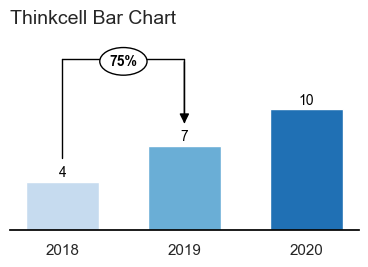

In [40]:
# Example usage
create_chart(
    ['2018', '2019', '2020'],
    [4, 7, 10],
    'Thinkcell Bar Chart',
    arrow_start=0,
    arrow_end=1
)

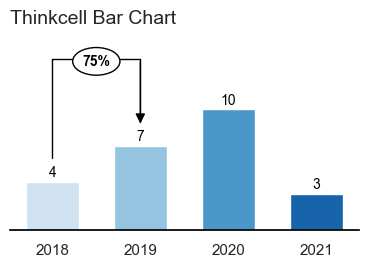

In [41]:
# Example usage
create_chart(
    ['2018', '2019', '2020', '2021'],
    [4, 7, 10, 3],
    'Thinkcell Bar Chart',
    arrow_start=0,
    arrow_end=1
)